MUSIC RECOMMENDATION SYSTEM

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import os
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action ="ignore", category =FutureWarning)

In [2]:
data_main = pd.read_csv('top_100_streamed_songs.csv').drop(['id'], axis=1)


In [3]:
data_main.head()

,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,Good 4 U Olivia Rodrigo,2.97,0.664,9,-5.044,1,0.1540,0.33500,0.000,0.0849,0.688,166.928,0.563
1,Stay The Kid LAROI & Justin Bieber,2.30,0.506,8,-11.275,1,0.0589,0.37900,0.868,0.1100,0.454,170.054,0.564
2,Levitating Dua Lipa feat. DaBaby,3.38,0.825,6,-3.787,0,0.0601,0.00883,0.000,0.0674,0.915,102.977,0.702
3,Peaches Justin Bieber feat. Daniel Caesar & Gi...,3.30,0.696,0,-6.181,1,0.1190,0.32100,0.000,0.4200,0.464,90.030,0.677
4,Montero (Call Me By Your Name) Lil Nas X,2.30,0.503,8,-6.725,0,0.2200,0.29300,0.000,0.4050,0.710,178.781,0.593


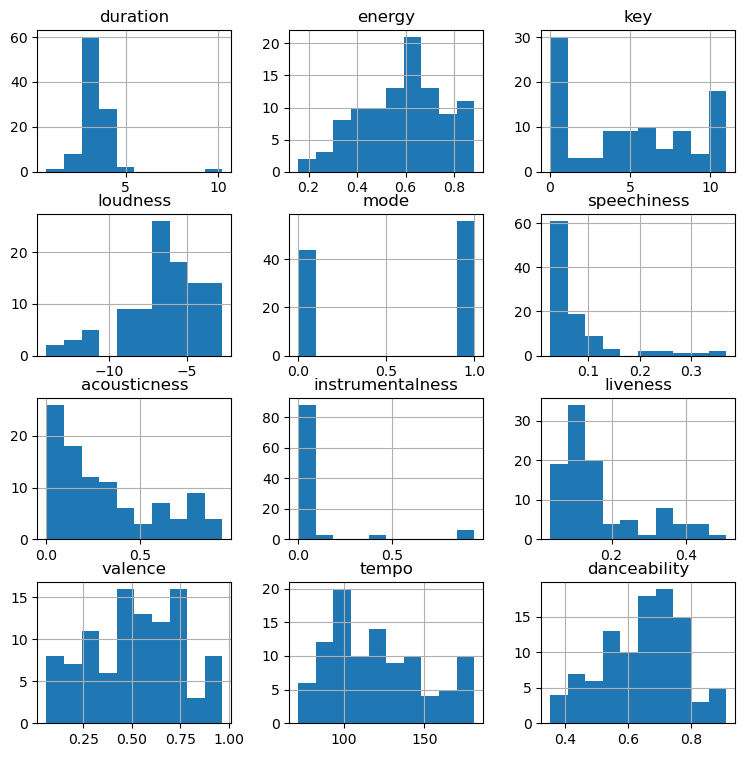

In [4]:
data_main.hist(figsize = (9,9));

In [5]:
data_main.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,100.0,3.404900,0.927022,0.73000,2.910000,3.3700,3.630000,10.220
energy,100.0,0.587650,0.168273,0.15700,0.477750,0.6090,0.707750,0.883
key,100.0,5.050000,3.825420,0.00000,1.000000,5.0000,8.000000,11.000
loudness,100.0,-6.577120,2.447338,-14.06700,-7.676250,-6.2625,-4.786750,-2.724
mode,100.0,0.560000,0.498888,0.00000,0.000000,1.0000,1.000000,1.000
speechiness,100.0,0.075461,0.068065,0.02530,0.036100,0.0518,0.080650,0.368
acousticness,100.0,0.314539,0.281076,0.00028,0.090750,0.2385,0.519750,0.941
instrumentalness,100.0,0.070682,0.221947,0.00000,0.000000,0.0000,0.000083,0.941
liveness,100.0,0.161737,0.112657,0.03410,0.088375,0.1200,0.205250,0.509
valence,100.0,0.517354,0.237512,0.05920,0.329000,0.5420,0.711500,0.967


Approach 1: Recommendation with Euclidean distance

Euclidean distance is a distance metric that can be used to measure the similarity between two items in a multi-dimensional space

In [6]:
data = data_main.drop(['name'], axis=1)


In [7]:
data.head()

,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,2.97,0.664,9,-5.044,1,0.1540,0.33500,0.000,0.0849,0.688,166.928,0.563
1,2.30,0.506,8,-11.275,1,0.0589,0.37900,0.868,0.1100,0.454,170.054,0.564
2,3.38,0.825,6,-3.787,0,0.0601,0.00883,0.000,0.0674,0.915,102.977,0.702
3,3.30,0.696,0,-6.181,1,0.1190,0.32100,0.000,0.4200,0.464,90.030,0.677
4,2.30,0.503,8,-6.725,0,0.2200,0.29300,0.000,0.4050,0.710,178.781,0.593


In [8]:
data.shape

(100, 12)

In [9]:
data_main.shape

(100, 13)

In [10]:
#select features
df_features = data.iloc[:,1:]
#scale
df_features_scaled =  MinMaxScaler().fit_transform(df_features)

def n_nearest_row(data,input_row,n=5):
    print("Input song:\n",pd.DataFrame(data.iloc[input_row,:]).T)

    distances = pdist(data.values, metric='euclidean')
    dist_matrix = squareform(distances)
    distances_from_input_row = pd.DataFrame(dist_matrix)[input_row].sort_values()

    distances_from_input_row = distances_from_input_row[1:n+1].sort_index()
    nearest_rows = data_main[data.index.isin(distances_from_input_row.index)]

    output_df = pd.concat((nearest_rows,distances_from_input_row),axis=1)
    
    columns = list(data_main.columns)
    columns.append("distance")
    output_df.columns=columns

    return output_df
    
nearest_5_row = n_nearest_row(df_features,80) # we will examine the first index
print("\n\nNearest songs: ")
nearest_5_row

Input song:
     energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
80    0.52  5.0    -6.136   0.0       0.0712         0.124           0.00007   

    liveness  valence    tempo  danceability  
80     0.131    0.129  159.801         0.585  


Nearest songs: 


,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,distance
0,Good 4 U Olivia Rodrigo,2.97,0.664,9,-5.044,1,0.1540,0.3350,0.000,0.0849,0.688,166.928,0.563,8.329093
27,Forever After All Luke Combs,3.88,0.650,0,-5.195,1,0.0253,0.1910,0.000,0.0933,0.456,151.964,0.487,9.404547
47,Cover Me In Sunshine P!nk & Willow Sage Hart,2.37,0.488,5,-11.276,1,0.0568,0.0142,0.900,0.1560,0.107,160.013,0.543,5.318889
50,My Universe Coldplay x BTS,0.73,0.379,1,-7.135,0,0.0461,0.9410,0.456,0.2260,0.967,153.920,0.411,7.295312
96,Dance With Me Tonight Olly Murs,3.37,0.748,11,-5.922,0,0.0589,0.3050,0.000,0.0811,0.964,163.984,0.672,7.371259
